In [1]:
from nuscenes.can_bus.can_bus_api import NuScenesCanBus
from nuscenes.nuscenes import NuScenes
import numpy as np
import math
#!pip install nuscenes-devkit
nusc_can = NuScenesCanBus(dataroot='data/sets/nuscenes')

In [13]:
scene_name = 'scene-0061'
nusc_can.print_all_message_stats(scene_name)

{
  "ms_imu": [
    "ms_imu",
    "pose",
    "steeranglefeedback",
    "vehicle_monitor",
    "zoe_veh_info",
    "zoesensors"
  ],
  "pose": [
    "ms_imu",
    "pose",
    "steeranglefeedback",
    "vehicle_monitor",
    "zoe_veh_info",
    "zoesensors"
  ],
  "steeranglefeedback": [
    "ms_imu",
    "pose",
    "steeranglefeedback",
    "vehicle_monitor",
    "zoe_veh_info",
    "zoesensors"
  ],
  "vehicle_monitor": [
    "ms_imu",
    "pose",
    "steeranglefeedback",
    "vehicle_monitor",
    "zoe_veh_info",
    "zoesensors"
  ],
  "zoesensors": [
    "ms_imu",
    "pose",
    "steeranglefeedback",
    "vehicle_monitor",
    "zoe_veh_info",
    "zoesensors"
  ],
  "zoe_veh_info": [
    "ms_imu",
    "pose",
    "steeranglefeedback",
    "vehicle_monitor",
    "zoe_veh_info",
    "zoesensors"
  ]
}


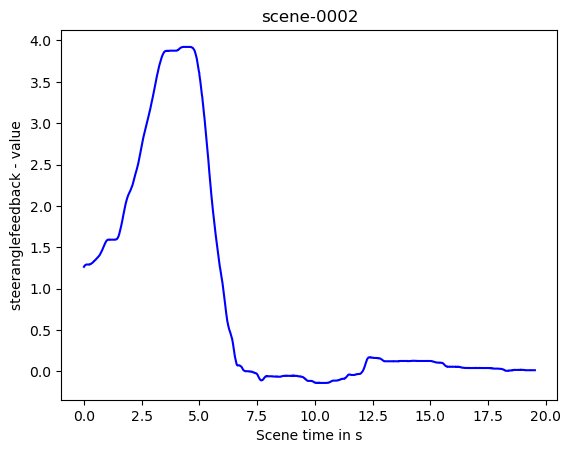

[{'utime': 1531883719453387, 'value': 1.2636183784438961},
 {'utime': 1531883719462964, 'value': 1.2688543661998744},
 {'utime': 1531883719472837, 'value': 1.272345024703868},
 {'utime': 1531883719485767, 'value': 1.2775810124598461},
 {'utime': 1531883719493133, 'value': 1.2793263417118388},
 {'utime': 1531883719503565, 'value': 1.2828170002158321},
 {'utime': 1531883719512984, 'value': 1.284562329467825},
 {'utime': 1531883719523594, 'value': 1.2880529879718103},
 {'utime': 1531883719533140, 'value': 1.2880529879718103},
 {'utime': 1531883719542779, 'value': 1.2897983172238112},
 {'utime': 1531883719553543, 'value': 1.2915436464758039},
 {'utime': 1531883719562925, 'value': 1.2915436464758039},
 {'utime': 1531883719573343, 'value': 1.2915436464758039},
 {'utime': 1531883719582582, 'value': 1.2915436464758039},
 {'utime': 1531883719593217, 'value': 1.2915436464758039},
 {'utime': 1531883719602736, 'value': 1.2915436464758039},
 {'utime': 1531883719613422, 'value': 1.2915436464758039},

In [3]:
message_name = 'steeranglefeedback'
key_name = 'value'
nusc_can.plot_message_data(scene_name, message_name, key_name)

nusc_can.get_messages(scene_name, message_name, key_name)

Steering angle feedback in radians in range [-7.7, 6.3]. 0 indicates no steering, positive values indicate left turns, negative values right turns. Here, it seems like the scene starts with a strong left turn and then continues more or less straight.

https://github.com/nutonomy/nuscenes-devkit/blob/master/python-sdk/nuscenes/can_bus/README.md#steer-angle-feedback

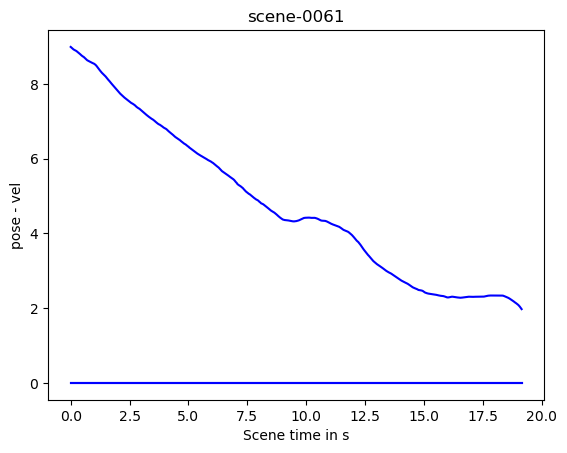

In [14]:
message_name = 'pose'
key_name = 'vel'
nusc_can.plot_message_data(scene_name, message_name, key_name)

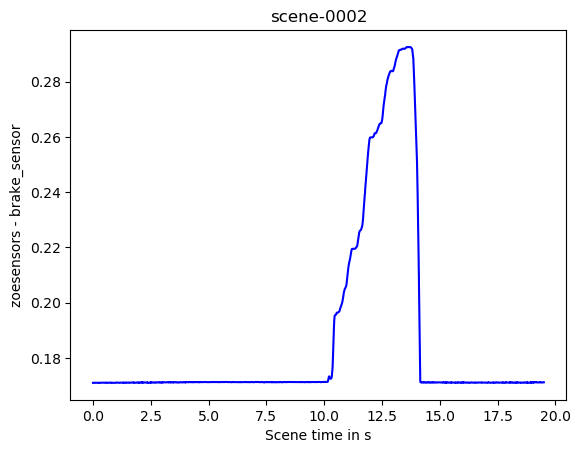

In [5]:
message_name = 'zoesensors'
key_name = 'brake_sensor'
nusc_can.plot_message_data(scene_name, message_name, key_name)

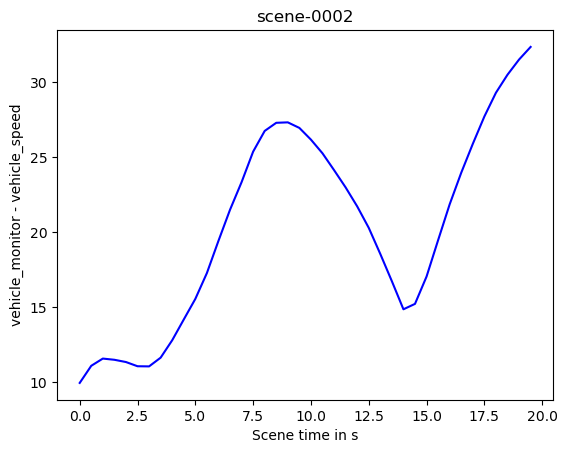

In [6]:
message_name = 'vehicle_monitor'
key_name = 'vehicle_speed'
nusc_can.plot_message_data(scene_name, message_name, key_name)

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Retrieve raw data.
wheel_speed = nusc_can.get_messages(scene_name, 'zoe_veh_info')
wheel_speed = np.array([(m['utime'], m['FL_wheel_speed']) for m in wheel_speed])

veh_speed = nusc_can.get_messages(scene_name, 'vehicle_monitor')
veh_speed = np.array([(m['utime'], m['vehicle_speed']) for m in veh_speed])

# Convert to m/s.
radius = 0.305  # Known Zoe wheel radius in meters.
circumference = 2 * np.pi * radius
wheel_speed[:, 1] *= circumference / 60
veh_speed[:, 1] *= 1 / 3.6

# Normalize time.
wheel_speed[:, 0] = (wheel_speed[:, 0] - wheel_speed[0, 0]) / 1e6
veh_speed[:, 0] = (veh_speed[:, 0] - veh_speed[0, 0]) / 1e6

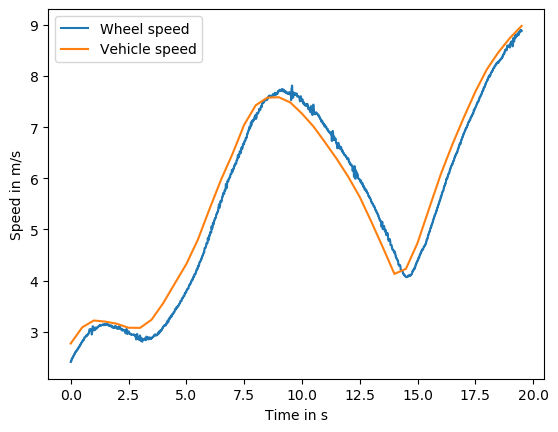

In [8]:
plt.plot(wheel_speed[:, 0], wheel_speed[:, 1])
plt.plot(veh_speed[:, 0], veh_speed[:, 1])
plt.xlabel('Time in s')
plt.ylabel('Speed in m/s')
plt.legend(['Wheel speed', 'Vehicle speed']);

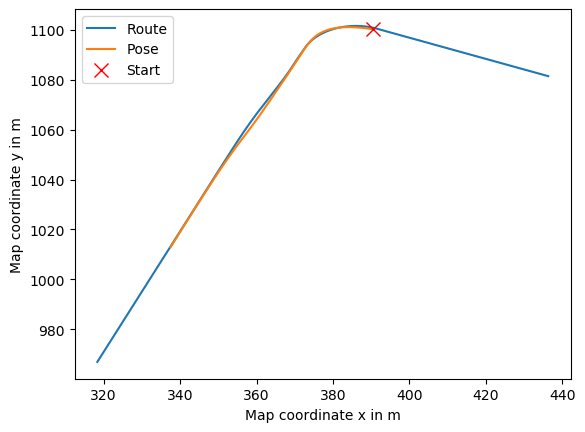

In [9]:
nusc_can.plot_baseline_route(scene_name)

Print all the missaligned routes. Label all the routes that are missaligned as missaligned and the allligned ones as aligned in the data set.

In [10]:
print(nusc_can.list_misaligned_routes())

['scene-0071', 'scene-0073', 'scene-0074', 'scene-0075', 'scene-0076', 'scene-0085', 'scene-0100', 'scene-0101', 'scene-0106', 'scene-0107', 'scene-0108', 'scene-0109', 'scene-0110', 'scene-0111', 'scene-0112', 'scene-0113', 'scene-0114', 'scene-0115', 'scene-0116', 'scene-0117', 'scene-0118', 'scene-0119', 'scene-0261', 'scene-0262', 'scene-0263', 'scene-0264', 'scene-0276', 'scene-0302', 'scene-0303', 'scene-0304', 'scene-0305', 'scene-0306', 'scene-0334', 'scene-0388', 'scene-0389', 'scene-0390', 'scene-0436', 'scene-0499', 'scene-0500', 'scene-0501', 'scene-0502', 'scene-0504', 'scene-0505', 'scene-0506', 'scene-0507', 'scene-0508', 'scene-0509', 'scene-0510', 'scene-0511', 'scene-0512', 'scene-0513', 'scene-0514', 'scene-0515', 'scene-0517', 'scene-0518', 'scene-0547', 'scene-0548', 'scene-0549', 'scene-0550', 'scene-0551', 'scene-0556', 'scene-0557', 'scene-0558', 'scene-0559', 'scene-0560', 'scene-0561', 'scene-0562', 'scene-0563', 'scene-0564', 'scene-0565', 'scene-0730', 'scen

In [11]:
print(nusc_can.can_blacklist)

[161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 172, 173, 174, 175, 176, 309, 310, 311, 312, 313, 314]
